This notebook is dedicated to Carrington's data, specifically for the derivation / estimation of the sunspots number based off of his area measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import graphs_helper
import time
from scipy.optimize import curve_fit
import scipy.optimize
import pylab


mysql connection successfully established with GOOD_DATA_SILSO
data successfully retrieved
Closing MySQL connection...


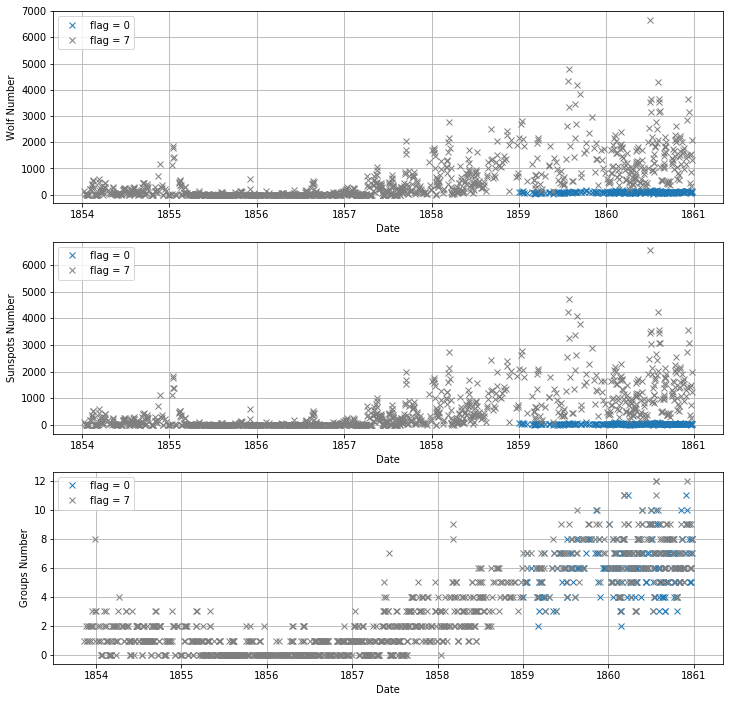

In [2]:
# plot Carrington
graphs_helper.display_seperate_flags_all(observer="Carrington")

In [3]:
# makes some data readyto plot for next windows
date199=[]
ygroups199=[] #list of rub 199 data that has sister in 303
date303=[]
ygroups303=[] #list of rub 303 data that has sister in 199
        
carrington303_dic, carrington199_dic = graphs_helper.get_carringdon_dictionaries_59to60()

for date in carrington199_dic:
    date199.append(date)
    ygroups199.append(carrington199_dic[date][0])
    date303.append(date)
    ygroups303.append(carrington303_dic[date][0])
    


mysql connection successfully established with GOOD_DATA_SILSO
data successfully retrieved
Closing MySQL connection...


In [4]:
# least squares fitting
# https://scipython.com/book/chapter-8-scipy/examples/weighted
# -and-non-weighted-least-squares-fitting/

# I want a linear best fit model for the right hand diagram
# only one degree of freedom a
def lin303_of_199(yg199,a):
    return a*yg199

# line fit
p0 = 1 # initial guess
# optimize, covariance
popt, pcov = curve_fit(lin303_of_199, ygroups199, ygroups303,p0)
yfit = lin303_of_199(ygroups199, popt)
print("fit parameter :",popt[0])
print("covariance matrix:"); print(pcov)
print()




fit parameter : 1.0914665835172481
covariance matrix:
[[0.00012841]]



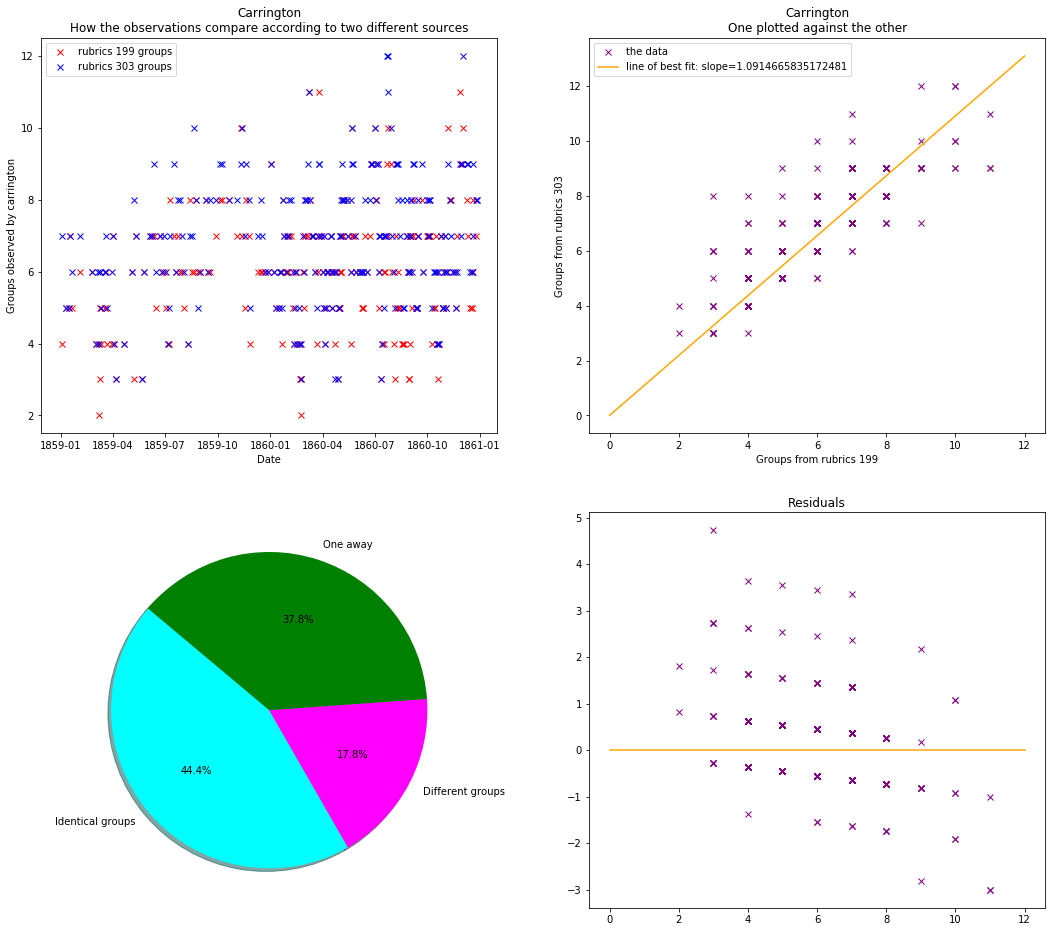

In [5]:
# compare the GROUPS visually
plt.figure(figsize=(18,16))

# on the TOP LEFT I want them next to each other
plt.subplot(221)

plt.plot(date199,ygroups199,"rx",label="rubrics 199 groups")
plt.plot(date303,ygroups303,"bx",label="rubrics 303 groups")
plt.xlabel("Date")
plt.ylabel("Groups observed by carrington")
plt.title("Carrington\nHow the observations compare according to two different sources")
plt.legend()

# on the TOP RIGHT right against each other
plt.subplot(222)
plt.plot(ygroups199,ygroups303,"x",color="purple",label='the data')

# plot the line of best fit
x = np.linspace(0,12,200)
plt.plot(x,lin303_of_199(x,popt),"-",color="orange",label='line of best fit: slope='+str(popt[0]))

plt.xlabel("Groups from rubrics 199")
plt.ylabel("Groups from rubrics 303")
plt.title("Carrington\nOne plotted against the other")
plt.legend()


#plt.show()


# BOTTOM LEFT is a pie chart
plt.subplot(223)
# now I will show that although this correction ~1.091 is close to 1 it is nonetheless needed
rubrics_aggree_on_groups_count = 0
rubrics_disagree_on_groups_count = 0
one_away = 0
for i in range(len(ygroups199)):
    if ygroups199[i]==ygroups303[i]:
        rubrics_aggree_on_groups_count +=1
        continue
    elif (ygroups199[i]-ygroups303[i])**2==1:
        one_away +=1
        continue
    rubrics_disagree_on_groups_count +=1

# piechart

labels = 'Identical groups', 'Different groups','One away'
sizes = [rubrics_aggree_on_groups_count,rubrics_disagree_on_groups_count,one_away]
colors = ['cyan', 'magenta','green']
explode = (0, 0, 0)  # to make slices pop out, put something like 0.1

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

# BOTTOM RIGHT is the residuals
plt.subplot(224)

plt.plot(x,np.linspace(0,0,200),'-',color="orange")
y = ygroups303-lin303_of_199(ygroups199,popt)
plt.plot(ygroups199,y,'x',color="purple")

plt.title("Residuals")

plt.savefig("Carrington1.png")
plt.show()